Colunas selecionadas:  [0, 4, 5, 2, 10, 12, 1, 9, 11, 8, 6, 7, 3]
Fold nº 0
Fold nº 1
Fold nº 2
Fold nº 3
Fold nº 4
Fold nº 5
Fold nº 6
Fold nº 7
Fold nº 8
Fold nº 9
Fold nº 10
Fold nº 11
Fold nº 12
Fold nº 13
Fold nº 14
Fold nº 15
Fold nº 16
Fold nº 17
Fold nº 18
Fold nº 19
Fold nº 20
Fold nº 21
Fold nº 22
Fold nº 23
Fold nº 24
Métricas medianas nos 5 folds:
AUC: 0.6884
F1 Macro: 0.6458
Precision Macro: 0.6578
Recall Macro: 0.6403
Accuracy: 0.7059
Fold: 0


  test blk 5: 100%|██████████| 35/35 [00:04<00:00,  8.57it/s]


Fold: 1


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  9.49it/s]


Fold: 2


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  9.44it/s]


Fold: 3


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  9.43it/s]


Fold: 4


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  9.19it/s]


Fold: 5


  test blk 5: 100%|██████████| 35/35 [00:03<00:00,  8.78it/s]


Fold: 6


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  9.04it/s]


Fold: 7


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  8.83it/s]


Fold: 8


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  8.91it/s]


Fold: 9


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  8.93it/s]


Fold: 10


  test blk 5: 100%|██████████| 35/35 [00:03<00:00,  8.83it/s]


Fold: 11


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  8.76it/s]


Fold: 12


  test blk 5: 100%|██████████| 34/34 [00:04<00:00,  8.48it/s]


Fold: 13


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  9.25it/s]


Fold: 14


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  9.15it/s]


Fold: 15


  test blk 5: 100%|██████████| 35/35 [00:03<00:00,  9.14it/s]


Fold: 16


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  9.22it/s]


Fold: 17


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  8.75it/s]


Fold: 18


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  8.84it/s]


Fold: 19


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  8.76it/s]


Fold: 20


  test blk 5: 100%|██████████| 35/35 [00:03<00:00,  8.96it/s]


Fold: 21


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  8.90it/s]


Fold: 22


  test blk 5: 100%|██████████| 34/34 [00:04<00:00,  8.36it/s]


Fold: 23


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  8.83it/s]


Fold: 24


  test blk 5: 100%|██████████| 34/34 [00:03<00:00,  8.63it/s]



=== k = 1 ===
AUC 0.7039657444005268 ± 0.09850162586614511
F1 Macro 0.6216809346625812 ± 0.07311326878890685
Precision Macro 0.6297357550831235 ± 0.07519465321077916
Recall Macro 0.6222990777338603 ± 0.07354798835159432
Accuracy 0.6738823529411765 ± 0.06633310048779134

=== k = 2 ===
AUC 0.5894993412384717 ± 0.06086931711189447
F1 Macro 0.5512582254966086 ± 0.0705663264678406
Precision Macro 0.5614156810854436 ± 0.07346366236836006
Recall Macro 0.5556521739130436 ± 0.06809524778470483
Accuracy 0.6234285714285714 ± 0.06133386346637004
Salvo em cd_terms_qc_vs_classical_DIGITAL_k2_l1_T_0.005_m_1_l_1_top50_rescaled_150.csv


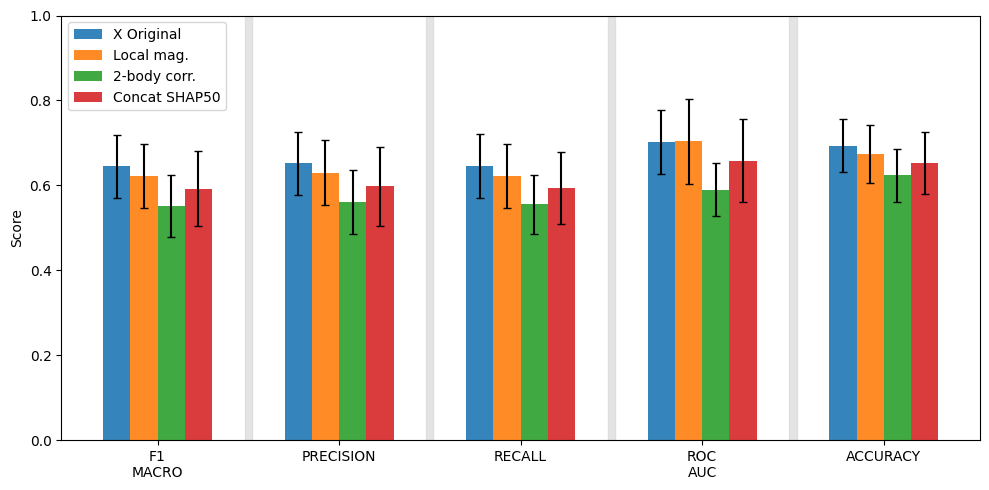

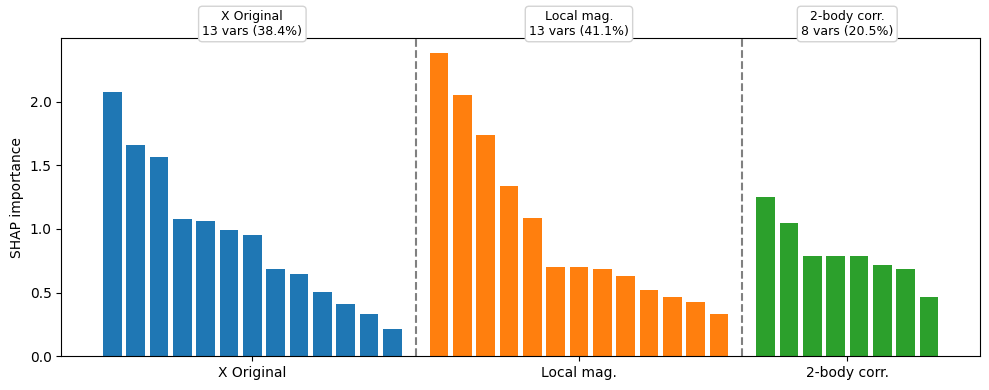

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from math import comb

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    roc_auc_score, f1_score, balanced_accuracy_score,
    precision_score, recall_score, accuracy_score
)

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
import shap

from itertools import combinations

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, SparsePauliOp, Operator
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.synthesis import SuzukiTrotter
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import qutip as qt
from tqdm import tqdm

SEED = 42
np.random.seed(SEED)
num_features = 150

#df_full = pd.read_csv('./data/data.csv')
# df_full = pd.read_csv('./data/Toxicity-13F.csv')
df_full = pd.read_csv(r'C:/Users/jiriv/Documents/škola/Diplom_thesis/Quantum-feature-maps/Dataset/Toxicity-13F.csv')
df_full['Class'] = df_full['Class'].map({'NonToxic': 1,'Toxic': 0})

# Separa features e target, ambos como numpy arrays
X = df_full.iloc[:, :-1].values
y = df_full.iloc[:, -1].values


def top_n_mi_features(X, y, n_features):
    mi = mutual_info_classif(
        X, y, n_neighbors=5, discrete_features=False, random_state=SEED
    )
    # argsort ordena crescente; [-n_features:] pega as maiores;
    # [::-1] inverte para ficar em ordem decrescente de importância
    top_indices = np.argsort(mi)[-n_features:][::-1]
    return top_indices.tolist()

col_sel = top_n_mi_features(X, y, num_features)
print('Colunas selecionadas: ', col_sel)
X = X[:, col_sel]   

# Normalização dos dados
def preprosseging_data(X_train, X_test):
    sc = StandardScaler() # reescala os dados usando z-score: (x - \mu (média))/\sigma (desvio padrão)
    Xtr = sc.fit_transform(X_train)
    Xte = sc.transform(X_test)
    return Xtr, Xte    


# Clássico
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=SEED)
metrics = {
    'AUC': [],
    'F1 Macro': [],
    'Precision Macro': [],
    'Recall Macro': [],
    'Accuracy': []
}

for fold, (train_id, test_id) in enumerate(rskf.split(X,y)):
    print(f'Fold nº {fold}')

    x_train = X[train_id]
    x_test = X[test_id]
    y_train = y[train_id]
    y_test = y[test_id]

    x_train, x_test = preprosseging_data(x_train, x_test)
    classifier = GradientBoostingClassifier(n_estimators=1000, random_state=SEED)
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)
    y_proba = classifier.predict_proba(x_test)[:, 1]

    # Métricas
    metrics['AUC'].append(roc_auc_score(y_test, y_proba))
    metrics['F1 Macro'].append(f1_score(y_test, y_pred, average='macro'))
    metrics['Precision Macro'].append(precision_score(y_test, y_pred, average='macro'))
    metrics['Recall Macro'].append(recall_score(y_test, y_pred, average='macro'))
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))    

# Exibir resultados
median_metrics = {k: np.median(v) for k, v in metrics.items()}

print("Métricas medianas nos 5 folds:")
for k, v in median_metrics.items():
    print(f"{k}: {v:.4f}")

# Quântico
#backend = AerSimulator(method="statevector", device='GPU')
backend = AerSimulator(method="statevector", device='CPU')

backend.options.seed_simulator = SEED
backend.options.seed_transpiler = SEED

estimator = Estimator(backend)

# Hiperparâmetros
# A_of_s = 2*np.pi * 15e9
# B_of_s = 2*np.pi * 11e9
A_of_s = 1
B_of_s = 1
order, reps = 2, 1
m = 1
k_max = 2
q_ks_for_aug = [1,2] # quais ks vão entrar no X_aug
# regime de impulso físico, ou seja, T\Delta, sendo \Delta = E1-E0 de H1 e H0
# tau = 0.01 # para um regime de impulso de até t\Delta = 0.005
tau = 0.005
# tau = 0.1
l=1 # ordem de aproximação dos termos CD

qc_rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=SEED)
qc_metrics = {
    'AUC': [],
    'F1 Macro': [],
    'Precision Macro': [],
    'Recall Macro': [],
    'Accuracy': []
}

# Funções para cálculo dos termos contradiabáticos
def ds_curve(t,T):
    s = t/T
    D = -((np.pi**2)/(4*T))*np.sin(np.pi*s)*np.sin(np.pi*(np.sin((np.pi/2)*s)**2))
    return D

# Simula o schedule D-Wave usando função seno → funções A_of_s, B_of_s (rad/s) --------
def s_curve(t_norm: float) -> float:
    """t_norm in [0,1]  →  lambda(t) in [0,1]"""
    return np.sin(0.5*np.pi * np.sin(0.5*np.pi * t_norm)**2)**2

# -------- 2) H_d e H_p  --------
def make_HD_HP(h_x, J_dict):
    n = len(h_x)
    HD = SparsePauliOp.from_list([( "I"*i + "X" + "I"*(n-i-1), -1.0) for i in range(n)])
    terms_HP = []
    for i, hi in enumerate(h_x):
        if hi != 0: terms_HP.append(("I"*i + "Z" + "I"*(n-i-1), float(hi)))
    for (i,j), Jij in J_dict.items():
        z = ["I"]*n; z[i]=z[j]="Z"
        terms_HP.append(("".join(z), float(Jij)))
    HP = SparsePauliOp.from_list(terms_HP)
    return HD, HP


def makeRt(h_x, J_dict, s, sum_hi2, sum_Jij2):
    sum_hi4 = 0
    sum_Jij4 = 0

    for hi in h_x:
        sum_hi4 += hi**4

    for (i,j), Jij in J_dict.items():
        sum_Jij4 += Jij**4

    N = len(h_x)  

    sum_hi2Jii2 = 0
    for i,j in combinations(range(N), 2):  #i<j
        Jij = J_dict[(i,j)]
        hi = h_x[i]
        hj = h_x[j]

        sum_hi2Jii2 += (hi**2 + hj**2)*(Jij**2)

    contrib_duplet = 2 * 6 * sum_hi2Jii2  # pois i<>j

    sum_triplet = 0.0
    for i, j, k in combinations(range(N), 3):  # i<j<k
        Jij = J_dict[(i, j)]
        Jik = J_dict[(i, k)]
        Jjk = J_dict[(j, k)]

        sum_triplet += (Jij**2 * Jik**2 +
                        Jij**2 * Jjk**2 +
                        Jik**2 * Jjk**2)

    
    contrib_triplet = 6.0 * sum_triplet  # i<j<k

    Rt = ((1 - s)**2)*(sum_hi2 + 4*sum_Jij2) + (s**2)*(sum_hi4 + 2*sum_Jij4 + contrib_duplet + contrib_triplet)
    # Rt = ((1 - s)**2)*(sum_hi2 + 4*sum_Jij2) + (s**2)*(sum_hi4 + sum_Jij4 + contrib_duplet + contrib_triplet)

    return Rt

def makeAlpha1(h_x, J_dict, s):
    sum_hi2 = 0
    sum_Jij2 = 0

    for hi in h_x:
        sum_hi2 += hi**2

    for (i,j), Jij in J_dict.items():
        sum_Jij2 += Jij**2

    alpha1 = -(1/4)*(sum_hi2 + 2*sum_Jij2) # aqui tem um fator 2 que falta no paper porque o correto é \sum_{i<>j} e não \sum_{i<j}
    Rt = makeRt(h_x, J_dict, s, sum_hi2, 2*sum_Jij2)
    alpha1 = alpha1/Rt

    return alpha1


def make_Hcd(h_x, J_dict, s, ds):
    n = len(h_x)
    terms_HP = []
    for i, hi in enumerate(h_x):
        if hi != 0: terms_HP.append(("I"*i + "Y" + "I"*(n-i-1), float(hi)))
    for (i,j), Jij in J_dict.items():
        YZ = ["I"]*n 
        ZY = ["I"]*n 
        YZ[i]= 'Y'
        YZ[j]= 'Z'
        ZY[i]= 'Z'
        ZY[j]= 'Y'        
        terms_HP.append(("".join(YZ), float(Jij)))
        terms_HP.append(("".join(ZY), float(Jij)))
    alpha1 = makeAlpha1(h_x, J_dict, s)
    Hcd = SparsePauliOp.from_list(terms_HP) * -2*ds*alpha1
    return Hcd

# -------- 3) circuito --------
def build_quench_circuit(h_x, J_dict, tau, m, A_of_s, B_of_s,
                         order=1, reps=1, insert_barriers=True, preserve_order=True):
    n  = len(h_x)
    dt = tau/m
    HD, HP = make_HD_HP(h_x, J_dict)

    qc = QuantumCircuit(n)
    qc.h(range(n))

    synth = SuzukiTrotter(order=order, reps=reps,
                          insert_barriers=insert_barriers,
                          preserve_order=preserve_order)   # wrap=False por padrão

    for k in range(m):
        t_mid = (k + 0.25)*dt

        s = s_curve(t_mid / tau) 
        ds = ds_curve(t_mid, tau)
        
        H_cd = make_Hcd(h_x, J_dict, s, ds)
           
        H_tot = HD + HP + H_cd


        # H_tot = A_of_s*HD*(1-s) + B_of_s*HP*s
        qc.append(PauliEvolutionGate(H_cd, time=dt, synthesis=synth), range(n))
        if insert_barriers: qc.barrier()

    return qc

# -------- 4) observáveis Z de peso ≤ k_max --------
def Z_observables(n, k_max=2):
    obs = []
    # peso-1
    for i in range(n):
        obs.append(SparsePauliOp.from_list([( "I"*i + "Z" + "I"*(n-i-1), 1.0 )]))
    # pesos 2..k_max
    for k in range(2, k_max+1):
        for idx in combinations(range(n), k):
            p = ["I"]*n
            for j in idx: p[j]="Z"
            obs.append(SparsePauliOp.from_list([("".join(p), 1.0)]))
    return obs

# -------- 5) vetor de features (multi-Z opcional) --------
def quantum_feature_vector(x_row, rho_ff, pairs, tau, m, A_of_s, B_of_s,
                           order=2, reps=12, k_max=2):
    n = len(x_row)
    h_vec = np.asarray(x_row, float)                           # h_i = x_i  (paper sem s_vec)
    J_dict = {(i,j): float(rho_ff[i,j]) for (i,j) in pairs}    # J_ij = rho_ij

    qc = build_quench_circuit(h_vec, J_dict, tau, m, A_of_s, B_of_s,
                              order=order, reps=reps)
    pm = generate_preset_pass_manager(optimization_level=0, backend=backend, seed_transpiler=42)
    qc_t = pm.run(qc)

    obs_list = Z_observables(n, k_max=k_max)
    obs_isa  = [obs.apply_layout(qc_t.layout) for obs in obs_list]

    job = estimator.run([(qc_t, obs_isa)])
    expvals = job.result()[0].data.evs
    return np.asarray(expvals, dtype=np.float64)

def q_feature_matrix(X, rho_ff, pairs, tau, m, A_of_s, B_of_s,
                     order=2, reps=12, k_max=2, desc="qmap"):
    from tqdm import tqdm
    feats = []
    for row in tqdm(X, desc=desc, leave=True):
        feats.append(
            quantum_feature_vector(row, rho_ff, pairs, tau, m, A_of_s, B_of_s,
                                   order=order, reps=reps, k_max=k_max)
        )
    return np.vstack(feats)


def update_metrics(metrics_dict, y_test, y_pred, y_proba):
    metrics_dict['AUC'].append(roc_auc_score(y_test, y_proba))
    metrics_dict['F1 Macro'].append(f1_score(y_test, y_pred, average='macro'))
    metrics_dict['Precision Macro'].append(precision_score(y_test, y_pred, average='macro'))
    metrics_dict['Recall Macro'].append(recall_score(y_test, y_pred, average='macro'))
    metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred))


def init_metrics_dict():
    return {
        'AUC': [],
        'F1 Macro': [],
        'Precision Macro': [],
        'Recall Macro': [],
        'Accuracy': []
    }

# dicionário de métricas para cada peso k
qc_k_metrics = {
    k: init_metrics_dict()   # sua função que cria o dict vazio de métricas
    for k in range(1, k_max+1)
}

shap50_metrics = {k: [] for k in ['AUC','F1 Macro','Precision Macro','Recall Macro','Accuracy']}

shap_rankings = []  # lista de DataFrames, um por split (fold×repeat)

# Rodando o circuito quântico como feature map para a RepeatedStratifiedKFold
rho_thr = 0
gamma_q = 1 
for fold, (train_id, test_id) in enumerate(qc_rskf.split(X, y)):
    print(f'Fold: {fold}')

    # dados do fold
    X_tr_raw, X_te_raw = X[train_id], X[test_id]
    y_train, y_test = y[train_id], y[test_id]

    # 1) preprocess: mediana + StandardScaler (fit só no treino)
    X_train, X_test = preprosseging_data(X_tr_raw, X_te_raw)    

    # rho_ff = np.corrcoef(X_train, rowvar=False); np.fill_diagonal(rho_ff, 0)
    # pairs = [(i,j) for i in range(n) for j in range(i+1,n) if abs(rho_ff[i,j]) >= 0.0]  

    X_copy = X_train.copy()
    n_features = X_copy.shape[1]

    num_blocks = 6
    block_size = n_features // num_blocks
    resto = n_features % num_blocks

    # lista com (start, end) para cada bloco
    blocks = []
    start = 0
    for b in range(num_blocks):
        extra = 1 if b < resto else 0  # distribui o resto nos primeiros blocos
        end = start + block_size + extra
        blocks.append((start, end))
        start = end

    Xq_train_blocks = []
    Xq_test_blocks  = []
    n_qubits_per_block = []

    for b, (start, end) in enumerate(blocks):
        # fatia de features deste bloco (mesmos índices para train e test)
        X_train_b = X_train[:, start:end]
        X_test_b  = X_test[:,  start:end]

        n_b = X_train_b.shape[1]
        n_qubits_per_block.append(n_b)

        # MI só dentro do bloco
        MI_b = np.zeros((n_b, n_b))
        for i in range(n_b):
            for j in range(i+1, n_b):
                MI_b[i, j] = mutual_info_regression(
                    X_train_b[:, [i]],
                    X_train_b[:, j],
                    random_state=SEED
                )[0]
                MI_b[j, i] = MI_b[i, j]

        MI_norm_b = MI_b / (MI_b.max() + 1e-12)

        pairs_b = [
            (i, j)
            for i in range(n_b)
            for j in range(i+1, n_b)
            if MI_b[i, j] >= rho_thr
        ]

        rho_ff_b = MI_norm_b

        Xq_train_b = q_feature_matrix(
            X_train_b, rho_ff_b, pairs_b,
            tau, m, A_of_s, B_of_s,
            order=order, reps=reps, k_max=k_max,
            desc=f"  train blk {b}"
        )

        Xq_test_b = q_feature_matrix(
            X_test_b, rho_ff_b, pairs_b,
            tau, m, A_of_s, B_of_s,
            order=order, reps=reps, k_max=k_max,
            desc=f"  test blk {b}"
        )

        Xq_train_blocks.append(Xq_train_b)
        Xq_test_blocks.append(Xq_test_b)

    # 1) concatena blocos em uma matriz única, depois reescala
    Xq_train_full = np.hstack(Xq_train_blocks)
    Xq_test_full  = np.hstack(Xq_test_blocks)

    sc_q = StandardScaler()
    Xq_train = sc_q.fit_transform(Xq_train_full)
    Xq_test  = sc_q.transform(Xq_test_full)

    n_cl = X_train.shape[1]
    k_max_eff = min(k_max, max(n_qubits_per_block))

    # 2) tamanhos (por bloco, por k) para saber onde cada pedaço está em Xq_train
    sizes_by_block = []          # lista: para cada bloco b, [size_k=1, size_k=2, ...]
    for n_b in n_qubits_per_block:
        sizes_b = [comb(n_b, k) for k in range(1, k_max_eff + 1)]
        sizes_by_block.append(sizes_b)

    # checagem: cada Xq_train_blocks[b] tem sum_k sizes_b[k] colunas
    for sizes_b, Xq_b in zip(sizes_by_block, Xq_train_blocks):
        assert sum(sizes_b) == Xq_b.shape[1]

    # 3) monta dicionários k -> matriz (empilhando todos os blocos para aquele k)
    Xq_blocks_train = {k: [] for k in range(1, k_max_eff + 1)}
    Xq_blocks_test  = {k: [] for k in range(1, k_max_eff + 1)}

    offset = 0
    for sizes_b in sizes_by_block:
        block_total = sum(sizes_b)
        local_off = 0
        for k_idx, size_k in enumerate(sizes_b, start=1):
            start_col = offset + local_off
            end_col   = start_col + size_k

            Xq_blocks_train[k_idx].append(Xq_train[:, start_col:end_col])
            Xq_blocks_test[k_idx].append(Xq_test[:,  start_col:end_col])

            local_off += size_k
        offset += block_total

    # junta blocos por k
    for k in range(1, k_max_eff + 1):
        Xq_blocks_train[k] = np.hstack(Xq_blocks_train[k])
        Xq_blocks_test[k]  = np.hstack(Xq_blocks_test[k])

    # tamanhos finais por k (para SHAP e sanity check)
    block_sizes = {k: Xq_blocks_train[k].shape[1] for k in range(1, k_max_eff + 1)}
    n_q_total   = sum(block_sizes.values())
    assert n_q_total == Xq_train.shape[1]

    # Agora Xq_blocks_train[1] tem todas as features 1-local (somando todos os blocos), Xq_blocks_train[2] tem todas as 2-local, etc.;


    # ----------------- ESCOLHA DE K PARA AUGMENT (só 2-local, por ex.) -----------------
    # Garante que os k escolhidos existem
    q_ks_for_aug_eff = [k for k in q_ks_for_aug if k in Xq_blocks_train]

    # Empilha apenas os blocos escolhidos
    Xq_train_aug = np.hstack([Xq_blocks_train[k] for k in q_ks_for_aug_eff])
    Xq_test_aug  = np.hstack([Xq_blocks_test[k]  for k in q_ks_for_aug_eff])

    n_q_total_aug = Xq_train_aug.shape[1]


    # ============================================================
    # 3) MÉTRICAS PURO QUÂNTICO, SEPARADAS POR k
    # ============================================================

    for k in range(1, k_max_eff + 1):
        Xqk_train = Xq_blocks_train[k]
        Xqk_test  = Xq_blocks_test[k]

        model_qk = GradientBoostingClassifier(n_estimators=1000, random_state=42)
        model_qk.fit(Xqk_train, y_train)

        y_pred_qk  = model_qk.predict(Xqk_test)
        y_proba_qk = model_qk.predict_proba(Xqk_test)[:, 1]

        update_metrics(qc_k_metrics[k], y_test, y_pred_qk, y_proba_qk)

    # ============================================================
    # 4) Construir X_aug (clássico + TODAS quânticas 1..k_max)
    #    para o SHAP e para o modelo SHAP50
    # ============================================================

    X_aug_train = np.hstack([X_train, gamma_q * Xq_train_aug]).astype(np.float32)
    X_aug_test  = np.hstack([X_test , gamma_q * Xq_test_aug ]).astype(np.float32)



    # ---------- nomes das features ----------

    cl_names = [f"cl_{j}" for j in range(n_cl)]

    q_names_by_k = {k: [] for k in range(1, k_max_eff + 1)}

    for (start, end) in blocks:
        n_b = end - start
        for k in range(1, k_max_eff + 1):
            if n_b < k:
                continue
            # combinações de índices *globais* desse bloco
            for combo_local in combinations(range(n_b), k):
                combo_global = [start + idx for idx in combo_local]
                if k == 1:
                    name = f"q1_z_{combo_global[0]}"
                else:
                    idx_str = "_".join(str(g) for g in combo_global)
                    name = f"q{k}_z_{idx_str}"
                q_names_by_k[k].append(name)

    # só nomes dos k realmente usados no augment
    all_q_names_for_aug = []
    for k in q_ks_for_aug_eff:
        all_q_names_for_aug.extend(q_names_by_k[k])

    feat_names_aug = cl_names + all_q_names_for_aug
    assert len(feat_names_aug) == X_aug_train.shape[1]



    # ============================================================
    # SHAP em X_aug (clássico + todas quânticas 1..k_max)
    # ============================================================

    model_shap = GradientBoostingClassifier(n_estimators=1000, random_state=42)
    model_shap.fit(X_aug_train, y_train)

    explainer = shap.TreeExplainer(model_shap)
    shap_values = explainer.shap_values(X_aug_train)

    if isinstance(shap_values, list):  # problema binário
        shap_values = shap_values[1]

    mean_abs_shap = np.mean(np.abs(shap_values), axis=0)  # (n_cl + n_q_total,)

    # --- separa SHAP em blocos: clássico + k=1..k_max_eff ---

    offset = 0
    shap_cl = mean_abs_shap[offset : offset + n_cl]
    offset += n_cl

    shap_by_k = {}
    for k in q_ks_for_aug_eff:
        size_k = block_sizes[k]
        shap_by_k[k] = mean_abs_shap[offset : offset + size_k]
        offset += size_k

    # --- reordenar cada bloco k por importância SHAP e salvar features ---

    Xq_blocks_train_sorted = {}
    Xq_blocks_test_sorted  = {}
    q_names_sorted_by_k    = {}

    for k in q_ks_for_aug_eff:
        shap_k  = shap_by_k[k]
        names_k = q_names_by_k[k]
        idx_sort = np.argsort(shap_k)[::-1]

        Xq_blocks_train_sorted[k] = Xq_blocks_train[k][:, idx_sort]
        Xq_blocks_test_sorted[k]  = Xq_blocks_test[k][:,  idx_sort]
        q_names_sorted_by_k[k]    = [names_k[i] for i in idx_sort]

    Xq_train_sorted = np.hstack([Xq_blocks_train_sorted[k] for k in q_ks_for_aug_eff])
    Xq_test_sorted  = np.hstack([Xq_blocks_test_sorted[k]  for k in q_ks_for_aug_eff])

    q_names_sorted_all = []
    for k in q_ks_for_aug_eff:
        q_names_sorted_all.extend(q_names_sorted_by_k[k])


    df_q_train = pd.DataFrame(Xq_train_sorted, columns=q_names_sorted_all)
    df_q_train["y"]     = y_train
    df_q_train["split"] = fold
    df_q_train["set"]   = "train"

    df_q_test = pd.DataFrame(Xq_test_sorted, columns=q_names_sorted_all)
    df_q_test["y"]     = y_test
    df_q_test["split"] = fold
    df_q_test["set"]   = "test"

    k_top = 50
    os.makedirs(f"features_T_{tau}_m_{m}_k_max{k_max}_l_{l}_top{k_top}_rescaled_{num_features}", exist_ok=True)
    df_q_train.to_csv(f"features_T_{tau}_m_{m}_k_max{k_max}_l_{l}_top{k_top}_rescaled_{num_features}/qfeatures_fold{fold}_train.csv", index=False)
    df_q_test.to_csv(f"features_T_{tau}_m_{m}_k_max{k_max}_l_{l}_top{k_top}_rescaled_{num_features}/qfeatures_fold{fold}_test.csv",  index=False)

    # ranking SHAP global (clássico + todas quânticas)
    shap_df_fold = pd.DataFrame({
        "split": fold,
        "feature": feat_names_aug,
        "mean_abs_shap": mean_abs_shap
    }).sort_values("mean_abs_shap", ascending=False)
    shap_rankings.append(shap_df_fold)

    # ============================================================
    # SHAP50: top-50 features (clássicas + quânticas) em X_aug
    # ============================================================

    # k_top = 20
    idx_top = np.argsort(mean_abs_shap)[-k_top:]

    X_train_50 = X_aug_train[:, idx_top]
    X_test_50  = X_aug_test[:,  idx_top]

    model_50 = GradientBoostingClassifier(n_estimators=1000, random_state=42)
    model_50.fit(X_train_50, y_train)

    y_pred_50  = model_50.predict(X_test_50)
    y_proba_50 = model_50.predict_proba(X_test_50)[:, 1]

    update_metrics(shap50_metrics, y_test, y_pred_50, y_proba_50)
 


k_top=50

def median_metrics(metrics_dict):
    return {k: np.median(v) for k, v in metrics_dict.items()}

for k in range(1, k_max+1):
    print(f"\n=== k = {k} ===")
    for metric, values in qc_k_metrics[k].items():
        print(metric, np.mean(values), "±", np.std(values))

# salva ranking SHAP de todos os splits
shap_rankings_all = pd.concat(shap_rankings, ignore_index=True)
shap_rankings_all.to_csv(f"shap_rankings_k{k_max}_l{l}_T_{tau}_m_{m}_l_{l}_top{k_top}_rescaled_{num_features}.csv", index=False)

COLS = [
    "AUC",
    "F1 Macro",
    "Precision Macro",
    "Recall Macro",
    "Accuracy"
]

def metrics_to_df(metrics_dict,
                  qc_flag,
                  model_type,          # <- novo: tipo de modelo/conjunto de features
                  num_steps=None,
                  h_scale=None,
                  theta_j=None,
                  **extra):
    df = pd.DataFrame({c: metrics_dict[c] for c in COLS})
    df["qc"] = qc_flag                  # ex: "QC", "Classical"
    df["model_type"] = model_type       # ex: "Q_1body", "Q_2body", "SHAP50"
    df["num_steps"] = num_steps
    df["h_scale"] = h_scale
    df["theta_j"] = theta_j
    for k, v in extra.items():
        df[k] = v
    return df

# clássico
df_cl = metrics_to_df(
    metrics,
    qc_flag="Classical",
    model_type="Classical_orig"
)

# quântico: um df por k
df_q_list = []
for k in range(1, k_max+1):
    df_qk = metrics_to_df(
        qc_k_metrics[k],
        qc_flag="QC",
        model_type=f"Q_{k}body"
    )
    df_q_list.append(df_qk)

# SHAP50 (clássico + quântico)
df_shap50 = metrics_to_df(
    shap50_metrics,
    qc_flag="QC+CL",
    model_type="SHAP50"
)

# concatena tudo
df_all = pd.concat(
    [df_cl, *df_q_list, df_shap50],
    ignore_index=True
)

df_all.to_csv(
    f"cd_terms_qc_vs_classical_DIGITAL_k{k_max}_l{l}_T_{tau}_m_{m}_l_{l}_top{k_top}_rescaled_{num_features}.csv",
    index=False
)

print(f"Salvo em cd_terms_qc_vs_classical_DIGITAL_k{k_max}_l{l}_T_{tau}_m_{m}_l_{l}_top{k_top}_rescaled_{num_features}.csv")


# ----------------------------Gerando gráficos------------------------------------------------
# -------------------------------Gráfico 1----------------------------------------------------
# ordem das métricas no eixo x
metrics_order = ["F1 Macro", "Precision Macro", "Recall Macro", "AUC", "Accuracy"]

# ordem dos modelos: clássico, todos Q_k, SHAP50
model_order = ["Classical_orig"] \
              + [f"Q_{k}body" for k in range(1, k_max+1)] \
              + ["SHAP50"]

# legendas bonitinhas
label_map = {
    "Classical_orig": "X Original",
    "SHAP50":         "Concat SHAP50"
}
for k in range(1, k_max+1):
    if k == 1:
        label = "Local mag."
    elif k == 2:
        label = "2-body corr."
    else:
        label = f"{k}-body corr."
    label_map[f"Q_{k}body"] = label

# agrega média e std
agg = df_all.groupby("model_type")[metrics_order].agg(["mean", "std"])

means = agg.xs("mean", axis=1, level=1).reindex(model_order)
stds  = agg.xs("std",  axis=1, level=1).reindex(model_order)

x = np.arange(len(metrics_order))
width = 0.15  # talvez diminuir um pouco se tiver muitos k

fig, ax = plt.subplots(figsize=(10, 5))

for i, model in enumerate(model_order):
    ax.bar(
        x + (i - (len(model_order)-1)/2)*width,  # centraliza independente do nº de modelos
        means.loc[model],
        width,
        yerr=stds.loc[model],
        label=label_map[model],
        capsize=3,
        alpha=0.9
    )

ax.set_xticks(x)
ax.set_xticklabels(["F1\nMACRO", "PRECISION", "RECALL", "ROC\nAUC", "ACCURACY"])
ax.set_ylim(0, 1.0)
ax.set_ylabel("Score")
ax.legend(loc="upper left")

# faixas verticais cinza claro
for gx in np.arange(len(metrics_order)-1) + 0.5:
    ax.axvspan(gx-0.02, gx+0.02, color="lightgray", alpha=0.6)

plt.tight_layout()
plt.savefig(f"performance_of_quantum_features_k{k_max}_l{l}_T_{tau}_m_{m}_l_{l}_top{k_top}_rescaled_{num_features}.png")
# plt.show()


# ------------------------------------------------------------------------------------------
# -------------------------------Gráfico 2--------------------------------------------------
# média de |SHAP| por feature ao longo dos splits
feat_imp = (
    shap_rankings_all
    .groupby("feature")["mean_abs_shap"]
    .mean()
    .sort_values(ascending=False)
)

top_k = k_top
imp_top = feat_imp.head(top_k)
tot_top = imp_top.sum() if top_k > 0 else 0.0

# ----------------------------------------------------------
# separar grupos: clássico, q1, q2, ..., q_kmax
# ----------------------------------------------------------

group_labels = []
group_series = []

# grupo clássico
group_labels.append("X Original")
group_series.append(imp_top[imp_top.index.str.startswith("cl_")])

# grupos quânticos por k
for k in range(1, k_max+1):
    prefix = f"q{k}_"
    ser_k  = imp_top[imp_top.index.str.startswith(prefix)]
    if len(ser_k) == 0:
        continue  # se não aparecer nada de k-body no top50, pula
    if k == 1:
        lab = "Local mag."
    elif k == 2:
        lab = "2-body corr."
    else:
        lab = f"{k}-body corr."
    group_labels.append(lab)
    group_series.append(ser_k)

# ----------------------------------------------------------
# construir eixo x com blocos lado a lado para cada grupo
# ----------------------------------------------------------

fig, ax = plt.subplots(figsize=(10, 4))

x_blocks = []      # lista de arrays de posições x para cada grupo
separators = []    # onde desenhar linhas verticais
current = 0

for ser in group_series:
    xs = np.arange(len(ser)) + current
    x_blocks.append(xs)
    current = xs[-1] + 2   # +2 para um espacinho entre blocos
    separators.append(current - 1)

# desenha barras
for xs, ser, label in zip(x_blocks, group_series, group_labels):
    ax.bar(xs, ser.values, label=label)

# linhas tracejadas separando blocos (exceto depois do último)
for s in separators[:-1]:
    ax.axvline(s, color="grey", linestyle="--")

ax.set_ylabel("SHAP importance")

# x-ticks nos centros de cada bloco
xticks = [xs.mean() for xs in x_blocks]
ax.set_xticks(xticks)
ax.set_xticklabels(group_labels)

# ----------------------------------------------------------
# caixinhas com nº de vars e % do SHAP (estilo paper)
# ----------------------------------------------------------

y_max = imp_top.max() if len(imp_top) > 0 else 0.0

for xs, ser, label in zip(x_blocks, group_series, group_labels):
    n_vars = len(ser)
    pct = 100 * ser.sum() / tot_top if tot_top > 0 else 0.0
    x_center = xs.mean()
    ax.text(
        x_center,
        y_max*1.05,
        f"{label}\n{n_vars} vars ({pct:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=9,
        bbox=dict(boxstyle="round", fc="white", ec="lightgray")
    )

plt.tight_layout()
plt.savefig(f"shap_importance_of_quantum_features_k{k_max}_l{l}_T_{tau}_m_{m}_l_{l}_top{k_top}_rescaled_{num_features}.png")
# plt.show()